In [1]:
import pathlib
import logging
import threading
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
np.random.seed(0)
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
print(tf.__version__)
from sklearn.model_selection import StratifiedKFold
import time
dispositivoUsado = '/cpu:0' 
#dispositivoUsado = '/gpu:0'
exibirRodando = False
QuantasThreadsFinalizaram = 0
anonimo = False
plt.rcParams['figure.dpi'] = 600

2.7.0


In [2]:
dados = pd.read_csv('dados-Ambos-Tudo.csv')
dados["QoE"] = dados["QoE"] + 3

#---------------------------------------------------------
#DROPANDO LINHAS COM USO DE CPU E RAM ALTO

dados = dados[dados['UsoCpu'] < 81]
dados = dados[dados['UsoRam'] < 81]
dados.sample(frac=1).reset_index(drop=True)

#DROPANDO LINHAS COM USO DE CPU E RAM ALTO
#---------------------------------------------------------


dados = dados.sample(frac=1).reset_index(drop=True)
#Salvando quantos jogadores temos e quantas instancias temos



dicionarioJogadores = dados['NOME'].value_counts().to_dict()

#'NOME'
dadosFear = dados[dados['Jogo'] == 'FEAR']
dadosHL2 = dados[dados['Jogo'] == 'Half-Life 2']
dados = dados[dados['Jogo'] != 'FEAR']
numeroInstancias = len(dados)
dados.drop(['TempoJogo','UsoCpu', 'UsoRam', 'UsoGpu', 'UsoVram','TerminoPartida','Jogo'], axis=1, inplace=True)
dados.dropna(inplace=True)

dadosHL2.drop(['TempoJogo','UsoCpu', 'UsoRam', 'UsoGpu', 'UsoVram','TerminoPartida','Jogo'], axis=1, inplace=True)
dadosHL2.dropna(inplace=True)

dadosFear.drop(['TempoJogo','UsoCpu', 'UsoRam', 'UsoGpu', 'UsoVram','TerminoPartida','Jogo'], axis=1, inplace=True)
dadosFear.dropna(inplace=True)
porcentagemTeste = 0.2
porcentagemValidacao = 0.1
NumeroCamadasInternas = 64
print(numeroInstancias)

2020


In [3]:
def build_model_1(X_train):
 with tf.device(dispositivoUsado):
  model = keras.Sequential([
    layers.Dense(NumeroCamadasInternas, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(NumeroCamadasInternas, activation='relu'),
    layers.Dense(NumeroCamadasInternas, activation='relu'),
    layers.Dense(NumeroCamadasInternas, activation='relu'),
    layers.Dense(NumeroCamadasInternas, activation='relu'),
    layers.Dense(NumeroCamadasInternas, activation='relu'),
    layers.Dense(1)
  ])
    
  #optimizer = tf.keras.optimizers.RMSprop(0.001)
  optimizer = 'adam'

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [4]:
#Tipos: elu, exponential, selu, tanh, softsign, softplus, softmax, sigmoid, relu
def build_model_2(X_train):
 with tf.device(dispositivoUsado):
  model = keras.Sequential([
    layers.Dense(NumeroCamadasInternas, activation='linear', input_shape=[X_train.shape[1]]),
    layers.Dense(NumeroCamadasInternas, activation='linear'),
    layers.Dense(NumeroCamadasInternas, activation='linear'),
    layers.Dense(NumeroCamadasInternas, activation='linear'),
    layers.Dense(NumeroCamadasInternas, activation='linear'),
    layers.Dense(NumeroCamadasInternas, activation='linear'),
    layers.Dense(1)
  ])

  #optimizer = tf.keras.optimizers.RMSprop(0.001)
  optimizer = 'adam'

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [5]:
#Tipos: elu, exponential, selu, tanh, softsign, softplus, softmax, sigmoid, relu
def build_model_3(X_train):
 with tf.device(dispositivoUsado):
  model = keras.Sequential([
    layers.Dense(NumeroCamadasInternas, activation='softmax', input_shape=[X_train.shape[1]]),
    layers.Dense(NumeroCamadasInternas, activation='softmax'),
    layers.Dense(NumeroCamadasInternas, activation='softmax'),
    layers.Dense(NumeroCamadasInternas, activation='softmax'),
    layers.Dense(NumeroCamadasInternas, activation='softmax'),
    layers.Dense(NumeroCamadasInternas, activation='softmax'),
    layers.Dense(1)
  ])

  #optimizer = tf.keras.optimizers.RMSprop(0.001)
  optimizer = 'adam' 

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [6]:
#Tipos: elu, exponential, selu, tanh, softsign, softplus, softmax, sigmoid, relu
def build_model_4(X_train):
 with tf.device(dispositivoUsado):
  model = keras.Sequential([
    layers.Dense(NumeroCamadasInternas, activation='softplus', input_shape=[X_train.shape[1]]),
    layers.Dense(NumeroCamadasInternas, activation='softplus'),
    layers.Dense(NumeroCamadasInternas, activation='softplus'),
    layers.Dense(NumeroCamadasInternas, activation='softplus'),
    layers.Dense(NumeroCamadasInternas, activation='softplus'),
    layers.Dense(NumeroCamadasInternas, activation='softplus'),
    layers.Dense(1)
  ])

  #optimizer = tf.keras.optimizers.RMSprop(0.001)
  optimizer = 'adam' 

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [7]:
#Tipos: elu, exponential, selu, tanh, softsign, softplus, softmax, sigmoid, relu
def build_model_5(X_train):
 with tf.device(dispositivoUsado):
  model = keras.Sequential([
    layers.Dense(NumeroCamadasInternas, activation='softsign', input_shape=[X_train.shape[1]]),
    layers.Dense(NumeroCamadasInternas, activation='softsign'),
    layers.Dense(NumeroCamadasInternas, activation='softsign'),
    layers.Dense(NumeroCamadasInternas, activation='softsign'),
    layers.Dense(NumeroCamadasInternas, activation='softsign'),
    layers.Dense(NumeroCamadasInternas, activation='softsign'),
    layers.Dense(NumeroCamadasInternas, activation='softsign'),
    layers.Dense(1)
  ])

  #optimizer = tf.keras.optimizers.RMSprop(0.001)
  optimizer = 'adam'

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [8]:
#Tipos: elu, exponential, selu, tanh, softsign, softplus, softmax, sigmoid, relu
def build_model_6(X_train):
 with tf.device(dispositivoUsado):
  model = keras.Sequential([
    layers.Dense(NumeroCamadasInternas, activation='tanh', input_shape=[X_train.shape[1]]),
    layers.Dense(NumeroCamadasInternas, activation='tanh'),
    layers.Dense(NumeroCamadasInternas, activation='tanh'),
    layers.Dense(NumeroCamadasInternas, activation='tanh'),
    layers.Dense(NumeroCamadasInternas, activation='tanh'),
    layers.Dense(NumeroCamadasInternas, activation='tanh'),
    layers.Dense(1)
  ])

  #optimizer = tf.keras.optimizers.RMSprop(0.001)
  optimizer = 'adam'  

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [9]:
#Tipos: elu, exponential, selu, tanh, softsign, softplus, softmax, sigmoid, relu
def build_model_7(X_train):
 with tf.device(dispositivoUsado):
  model = keras.Sequential([
    layers.Dense(NumeroCamadasInternas, activation='selu', input_shape=[X_train.shape[1]]),
    layers.Dense(NumeroCamadasInternas, activation='selu'),
    layers.Dense(NumeroCamadasInternas, activation='selu'),
    layers.Dense(NumeroCamadasInternas, activation='selu'),
    layers.Dense(NumeroCamadasInternas, activation='selu'),
    layers.Dense(NumeroCamadasInternas, activation='selu'),
    layers.Dense(1)
  ])

  #optimizer = tf.keras.optimizers.RMSprop(0.001)
  optimizer = 'adam' 

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [10]:
#Tipos: elu, exponential, selu, tanh, softsign, softplus, softmax, sigmoid, relu
def build_model_8(X_train):
 with tf.device(dispositivoUsado):
  model = keras.Sequential([
    layers.Dense(NumeroCamadasInternas, activation='gelu', input_shape=[X_train.shape[1]]),
    layers.Dense(NumeroCamadasInternas, activation='gelu'),
    layers.Dense(NumeroCamadasInternas, activation='gelu'),
    layers.Dense(NumeroCamadasInternas, activation='gelu'),
    layers.Dense(NumeroCamadasInternas, activation='gelu'),
    layers.Dense(NumeroCamadasInternas, activation='gelu'),
    layers.Dense(1)
  ])

  #optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
  optimizer = 'adam'

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [11]:
#Tipos: elu, exponential, selu, tanh, softsign, softplus, softmax, sigmoid, relu
def build_model_9(X_train):
 with tf.device(dispositivoUsado):
  model = keras.Sequential([
    layers.Dense(NumeroCamadasInternas, activation='elu', input_shape=[X_train.shape[1]]),
    layers.Dense(NumeroCamadasInternas, activation='elu'),
    layers.Dense(NumeroCamadasInternas, activation='elu'),
    layers.Dense(NumeroCamadasInternas, activation='elu'),
    layers.Dense(NumeroCamadasInternas, activation='elu'),
    layers.Dense(NumeroCamadasInternas, activation='elu'),
    layers.Dense(1)
  ])

  #optimizer = tf.keras.optimizers.RMSprop(0.001)
  optimizer = 'adam' 

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [12]:
def arredondaVetor(vetor):
 with tf.device(dispositivoUsado):
    novoVetor = []
    for x in range(len(vetor)):
        if(vetor[x]>=0):
            floatTeste = vetor[x] - int(vetor[x])
            if(floatTeste>=0.5):
                novoVetor.append(int(vetor[x])+1)
            else:
                novoVetor.append(int(vetor[x]))
        else:
            valor = vetor[x]*(-1.0)
            floatTeste = valor - int(valor)
            if(floatTeste>=0.5):
                novoVetor.append((int(valor)+1)*-1)
            else:
                novoVetor.append(int(valor)*-1)
    return novoVetor

In [13]:
def porcentagemAcerto(vetor1,vetor2):
 with tf.device(dispositivoUsado):
    tamanho = float(len(vetor1))
    acertos = float(0)
    for x in range(len(vetor1)):
        if(vetor1[x]==vetor2[x]):
            acertos = acertos + 1.0
    acertos = (acertos/tamanho)*100.0
    return acertos

In [14]:
def rodarModeloRF(baseDados):
    if 'NOME' in baseDados.columns:
        baseDados.drop(['NOME'], axis=1, inplace=True)
        baseDados.dropna(inplace=True)
    n_estimators = 41
    max_features = 3
    max_depth = 7
    global porcentagemTeste
    X = np.asarray(baseDados[['DelayVideo', 'DelayComandos', 'JitterVideo', 'JitterComandos', 'PerdaVideo', 'PerdaComandos']])
    y = np.asarray(baseDados['QoE'])
    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    X_temp = np.zeros((baseDados.shape[0],baseDados.shape[1]))
    X_temp[:,:X.shape[1]] = X
    X = X_temp
    X[:, 6:-1] = np.asarray(baseDados[list(baseDados.drop(['DelayVideo', 'DelayComandos', 'JitterVideo','JitterComandos', 'PerdaVideo', 'PerdaComandos', 'QoE'], axis=1))])
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=porcentagemTeste, random_state=1)
    X_train = np.asarray(X_train).astype(np.float32)
    X_test = np.asarray(X_test).astype(np.float32)
    y_train = np.asarray(y_train).astype(np.float32)
    y_test = np.asarray(y_test).astype(np.float32)
    
    
    from sklearn.metrics import mean_squared_error
    modelos = list()
    mses = list()
    acertos = list()
    XT = list()
    YT = list()
    kFold = StratifiedKFold(n_splits=10)
    for train, test in kFold.split(X_train,y_train):
        rfr=RandomForestRegressor(n_estimators=n_estimators,max_features=max_features,criterion='mse',bootstrap=True,max_depth=max_depth)
        rfr.fit(X_train[train],y_train[train])
        y_pred=rfr.predict(X_train[test])#X_test
        test_predictions_round = arredondaVetor(y_pred)
        porcentagemAcertos = porcentagemAcerto(y_train[test],test_predictions_round)#y_test
        #print("Acerto:",round(porcentagemAcertos,4))
        mse = mean_squared_error(y_train[test],test_predictions_round)#y_test
        #print("MSE: "+str(mse))
        mses.append(mse)
        modelos.append(rfr)
        acertos.append(porcentagemAcertos)
        XT.append(X_train[test])
        YT.append(y_train[test])
    menorMSE = 99
    iMSE = 0
    for i in range(len(mses)):
        if(mses[i]<menorMSE):
            menorMSE = mses[i]
            iMSE = i
    model = modelos[iMSE]
    mse = mses[iMSE]
    acerto = acertos[iMSE]
    #print("Menor MSE: "+str(mse)+" com acerto: "+str(acerto))
    y_pred = model.predict(X_test)
    test_predictions_round = arredondaVetor(y_pred)
    porcentagemAcertos1 = porcentagemAcerto(y_test,test_predictions_round)
    #print("Acerto com todos dados:",round(porcentagemAcertos1,4))
    mse1 = mean_squared_error(y_test,test_predictions_round)
    #print("MSE com todos dados: "+str(mse1))

    return mse,acerto,model,X_test,y_test

In [24]:
def rodarModeloRFFear(baseDados):
    if 'NOME' in baseDados.columns:
        baseDados.drop(['NOME'], axis=1, inplace=True)
        baseDados.dropna(inplace=True)
    n_estimators = 41
    max_features = 3
    max_depth = 7
    global porcentagemTeste
    global porcentagemValidacao
    
    tempFear = dadosFear.copy(deep=True)
    if 'NOME' in tempFear.columns:
        tempFear.drop(['NOME'], axis=1, inplace=True)
        tempFear.dropna(inplace=True)
    
    
    X = np.asarray(baseDados[['DelayVideo', 'DelayComandos', 'JitterVideo', 'JitterComandos', 'PerdaVideo', 'PerdaComandos']])
    
    XFear = np.asarray(tempFear[['DelayVideo', 'DelayComandos', 'JitterVideo', 'JitterComandos', 'PerdaVideo', 'PerdaComandos']])
    
    y = np.asarray(baseDados['QoE'])
    
    yFear = np.asarray(tempFear['QoE'])
    
    scaler = StandardScaler()
    
    scalerFear = StandardScaler()
    
    scaler.fit(X)
    
    scalerFear.fit(XFear)
    
    X = scaler.transform(X)
    
    XFear = scalerFear.transform(XFear)
    
    X_temp = np.zeros((baseDados.shape[0],baseDados.shape[1]))
    
    X_tempFear = np.zeros((tempFear.shape[0],tempFear.shape[1]))
    
    X_temp[:,:X.shape[1]] = X
    
    X_tempFear[:,:XFear.shape[1]] = XFear
    
    X = X_temp
    
    XFear = X_tempFear
    
    X[:, 6:-1] = np.asarray(baseDados[list(baseDados.drop(['DelayVideo', 'DelayComandos', 'JitterVideo','JitterComandos', 'PerdaVideo', 'PerdaComandos', 'QoE'], axis=1))])
    
    XFear[:, 6:-1] = np.asarray(tempFear[list(tempFear.drop(['DelayVideo', 'DelayComandos', 'JitterVideo','JitterComandos', 'PerdaVideo', 'PerdaComandos', 'QoE'], axis=1))])
    
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=porcentagemTeste, random_state=1)
    
    XFear = np.asarray(XFear).astype(np.float32)
    yFear = np.asarray(yFear).astype(np.float32)
    
    X_train = np.asarray(X_train).astype(np.float32)
    X_test = np.asarray(X_test).astype(np.float32)
    y_train = np.asarray(y_train).astype(np.float32)
    y_test = np.asarray(y_test).astype(np.float32)
    
    
    from sklearn.metrics import mean_squared_error
    modelos = list()
    mses = list()
    acertos = list()
    XT = list()
    YT = list()
    kFold = StratifiedKFold(n_splits=10)
    for train, test in kFold.split(X_train, y_train):
        rfr=RandomForestRegressor(n_estimators=n_estimators,max_features=max_features,criterion='mse',bootstrap=True,max_depth=max_depth)
        rfr.fit(X_train[train],y_train[train])
        y_pred=rfr.predict(X_train[test])#X_test
        test_predictions_round = arredondaVetor(y_pred)
        porcentagemAcertos = porcentagemAcerto(y_train[test],test_predictions_round)#y_test
        #print("Acerto:",round(porcentagemAcertos,4))
        mse = mean_squared_error(y_train[test],test_predictions_round)#y_test
        #print("MSE: "+str(mse))
        mses.append(mse)
        modelos.append(rfr)
        acertos.append(porcentagemAcertos)
        XT.append(X_train[test])
        YT.append(y_train[test])
    menorMSE = 99
    iMSE = 0
    for i in range(len(mses)):
        if(mses[i]<menorMSE):
            menorMSE = mses[i]
            iMSE = i
    model = modelos[iMSE]
    mse = mses[iMSE]
    acerto = acertos[iMSE]
    #print("Menor MSE: "+str(mse)+" com acerto: "+str(acerto))
    y_pred = model.predict(XFear)
    test_predictions_round = arredondaVetor(y_pred)
    porcentagemAcertos1 = porcentagemAcerto(yFear,test_predictions_round)
    #print("Acerto com todos dados:",round(porcentagemAcertos1,4))
    mse1 = mean_squared_error(yFear,test_predictions_round)
    #print("MSE com todos dados: "+str(mse1))
    
    return mse,acerto,model,XFear,yFear

In [16]:
def plot_heatMap(test_predictions,y_test,nomeHeatmap):
    import seaborn as sns
    test_predictions_round = arredondaVetor(test_predictions)
    x_axis_labels = ['E. Péssimo','Péssimo','Ruim','Regular','bom','Excelente','Ideal'] # labels for x-axis
    y_axis_labels = ['E. Péssimo','Péssimo','Ruim','Regular','bom','Excelente','Ideal'] # labels for y-axis
    
    heatMatrix = np.zeros((7,7))
    for x in range(len(y_test)):
        intX = int(test_predictions_round[x])
        intY = int(y_test[x])
        if(intX > 6):
            continue
        heatMatrix[intX][intY] = heatMatrix[intX][intY] +1
                
    sns.heatmap(heatMatrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap="Greys")
    plt.savefig(nomeHeatmap+'.png', transparent=False)
    plt.show()

In [17]:
def plot_melhor(y_test, test_predictions,history,tipo):
 with tf.device(dispositivoUsado):
    histi = pd.DataFrame(history.history)
    histi['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Época')
    plt.ylabel('Erro Médio Absoluto [QoE]')
    plt.plot(histi['epoch'], histi['mae'],label='Erro de Treino')
    plt.plot(histi['epoch'], histi['val_mae'],label = 'Erro de Validação')
    plt.ylim([0,5])
    plt.legend()
    plt.savefig('melhor'+tipo+'ResSemAcordoMAE.png')
    plt.show()
    
        
    plt.figure()
    plt.xlabel('Época')
    plt.ylabel('Erro Médio Quadratico [$QoE^2$]')
    plt.plot(histi['epoch'], histi['mse'],label='Erro de Treino')
    plt.plot(histi['epoch'], histi['val_mse'],label = 'Erro de Validação')
    plt.ylim([0,20])
    plt.legend()
    plt.savefig('melhor'+tipo+'ResSemAcordoMSE.png')
    plt.show()
    
    
    plt.figure()
    plt.scatter(y_test, test_predictions)
    plt.xlabel('Valores Reais [QoE]')
    plt.ylabel('Predicões [QoE]')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim([0,plt.xlim()[1]])
    plt.ylim([0,plt.ylim()[1]])
    _ = plt.plot([-100, 100], [-100, 100])
    plt.savefig('melhor'+tipo+'ResSemAcordoPredicoesSemArredondar.png')
    plt.show()
    
    
    
    
    test_predictions_round = arredondaVetor(test_predictions)
    print("Porcentagem de acertos arredondado: "+str(porcentagemAcerto(y_test,test_predictions_round)))
    plt.figure()
    plt.scatter(y_test, test_predictions_round)
    plt.xlabel('Valores Reais [QoE]')
    plt.ylabel('Predicões Arredondadas [QoE]')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim([0,plt.xlim()[1]])
    plt.ylim([0,plt.ylim()[1]])
    _ = plt.plot([-100, 100], [-100, 100])
    plt.savefig('melhor'+tipo+'ResSemAcordoPredicoesArredondado.png')
    plt.show()
    
    plot_heatMap(test_predictions,y_test,"HeatMap_"+tipo)

In [18]:
tipoExecucao = 3
#2 - por Jogadores gerar um gráfico de MSE 
#3 - por Instancias gerar um grafico de MSE
#4 - tipo 2 e 3 combinados
repeticoes = 10
nucleos = 1
randomForest = True
global NumeroCamadasInternas
dados = dados.sample(frac=1).reset_index(drop=True)
NumeroCamadasInternas = 32
QualModelo = 8
InstanciaInicial = 1700
passo = 10
#2 - por Jogadores gerar um gráfico de MSE
if(tipoExecucao == 2):
 with tf.device(dispositivoUsado):
    roda = pd.DataFrame(columns = ['NOME','QoE','DelayVideo', 'DelayComandos', 'JitterVideo', 'JitterComandos', 'PerdaVideo', 'PerdaComandos'])
    QTDUsu = []
    MSEUsu = []
    nUsuarios = 1
    resultadosUsu = []
    yUsu = []
    predicaoUsu = []
    histUsu = []
    acertoRFUsu = []
    for key in dicionarioJogadores:
        teste = dados.loc[dados['NOME'] == key]
        roda = pd.concat([roda, teste], axis=0)
        QTDUsu.append(nUsuarios)
        nUsuarios = nUsuarios + 1
        rodaDropadoNome = roda.copy(deep=True)
        rodaDropadoNome.drop(['NOME'], axis=1, inplace=True)
        rodaDropadoNome.dropna(inplace=True)
        
        if(randomForest):
            mse,acerto,model,X_test,y_test = rodarModeloRF(rodaDropadoNome)
            for ABA in range(repeticoes):
                mse1,acerto1,model1,X_test1,y_test1 = rodarModeloRF(rodaDropadoNome)
                if(mse1<mse):
                    mse = mse1
                    acerto = acerto1
            MSEUsu.append(mse)
            acertoRFUsu.append(acerto)
        else:
            saida,y,predicao,hist = rodarModelo(QualModelo,rodaDropadoNome)
            for ABA in range(repeticoes):
                saida1,y1,predicao1,hist1 = rodarModelo(QualModelo,rodaDropadoNome)
                if(saida1[2]<saida[2]):
                    saida = saida1
                    y = y1
                    predicao = predicao1
            MSEUsu.append(saida[2])
            yUsu.append(y)
            predicaoUsu.append(predicao)
#3 - por Instancias gerar um grafico de MSE
elif(tipoExecucao == 3):
 with tf.device(dispositivoUsado):
    QTDIns = []
    MSEIns = []
    resultados = []
    resultadosIns = []
    yIns = []
    predicaoIns = []
    histIns = []
    acertoRFIns = []
    for incr in range(InstanciaInicial,numeroInstancias,passo):
        rodaDropadoNome = dados.head(incr).copy(deep=True)
        rodaDropadoNome.drop(['NOME'], axis=1, inplace=True)
        rodaDropadoNome.dropna(inplace=True)
        
        if(randomForest):
            mse,acerto,model,X_test,y_test = rodarModeloRF(rodaDropadoNome)
            for ABA in range(repeticoes):
                mse1,acerto1,model1,X_test1,y_test1 = rodarModeloRF(rodaDropadoNome)
                if(mse1<mse):
                    mse = mse1
                    acerto = acerto1
            QTDIns.append(incr)
            MSEIns.append(mse)
            acertoRFIns.append(acerto)
            print(".",end=" ")
        else:
            saida,y,predicao,hist = rodarModelo(QualModelo,rodaDropadoNome)
            for ABA in range(repeticoes):
                saida1,y1,predicao1,hist1 = rodarModelo(QualModelo,rodaDropadoNome)
                if(saida1[2]<saida[2]):
                    saida = saida1
                    y = y1
                    predicao = predicao1
            QTDIns.append(incr)
            MSEIns.append(saida[2])
            yIns.append(y)
            predicaoIns.append(predicao)
#2 - por Jogadores gerar um gráfico de MSE 
#3 - por Instancias gerar um grafico de MSE
#4 - tipo 2 e 3 combinados
elif(tipoExecucao == 4):
 with tf.device(dispositivoUsado):
    roda = pd.DataFrame(columns = ['NOME','QoE','DelayVideo', 'DelayComandos', 'JitterVideo', 'JitterComandos', 'PerdaVideo', 'PerdaComandos'])
    QTDUsu = []
    MSEUsu = []
    nUsuarios = 1
    resultadosUsu = []
    yUsu = []
    predicaoUsu = []
    histUsu = []
    acertoRFUsu = []
    for key in dicionarioJogadores:
        teste = dados.loc[dados['NOME'] == key]
        roda = pd.concat([roda, teste], axis=0)
        QTDUsu.append(nUsuarios)
        nUsuarios = nUsuarios + 1
        rodaDropadoNome = roda.copy(deep=True)
        rodaDropadoNome.drop(['NOME'], axis=1, inplace=True)
        rodaDropadoNome.dropna(inplace=True)
        print(rodaDropadoNome.head())
        if(randomForest):
            mse,acerto,model,X_test,y_test = rodarModeloRF(rodaDropadoNome)
            for ABA in range(repeticoes):
                mse1,acerto1,model1,X_test1,y_test1 = rodarModeloRF(rodaDropadoNome)
                if(mse1<mse):
                    mse = mse1
                    acerto = acerto1
            MSEUsu.append(mse)
            acertoRFUsu.append(acerto)
        else:
            saida,y,predicao,hist = rodarModelo(QualModelo,rodaDropadoNome)
            for ABA in range(repeticoes):
                saida1,y1,predicao1,hist1 = rodarModelo(QualModelo,rodaDropadoNome)
                if(saida1[2]<saida[2]):
                    saida = saida1
                    y = y1
                    predicao = predicao1
            MSEUsu.append(saida[2])
            yUsu.append(y)
            predicaoUsu.append(predicao)
            
    QTDIns = []
    MSEIns = []
    resultados = []
    resultadosIns = []
    yIns = []
    predicaoIns = []
    histIns = []
    acertoRFIns = []
    for incr in range(InstanciaInicial,numeroInstancias,passo):
        rodaDropadoNome = dados.head(incr).copy(deep=True)
        rodaDropadoNome.drop(['NOME'], axis=1, inplace=True)
        rodaDropadoNome.dropna(inplace=True)
        
        if(randomForest):
            mse,acerto,model,X_test,y_test = rodarModeloRF(rodaDropadoNome)
            for ABA in range(repeticoes):
                mse1,acerto1,model1,X_test1,y_test1 = rodarModeloRF(rodaDropadoNome)
                if(mse1<mse):
                    mse = mse1
                    acerto = acerto1
            QTDIns.append(incr)
            MSEIns.append(mse)
            acertoRFIns.append(acerto)
            print(".",end=" ")
        else:
            saida,y,predicao,hist = rodarModelo(QualModelo,rodaDropadoNome)
            for ABA in range(repeticoes):
                saida1,y1,predicao1,hist1 = rodarModelo(QualModelo,rodaDropadoNome)
                if(saida1[2]<saida[2]):
                    saida = saida1
                    y = y1
                    predicao = predicao1
            QTDIns.append(incr)
            MSEIns.append(saida[2])
            yIns.append(y)
            predicaoIns.append(predicao)

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

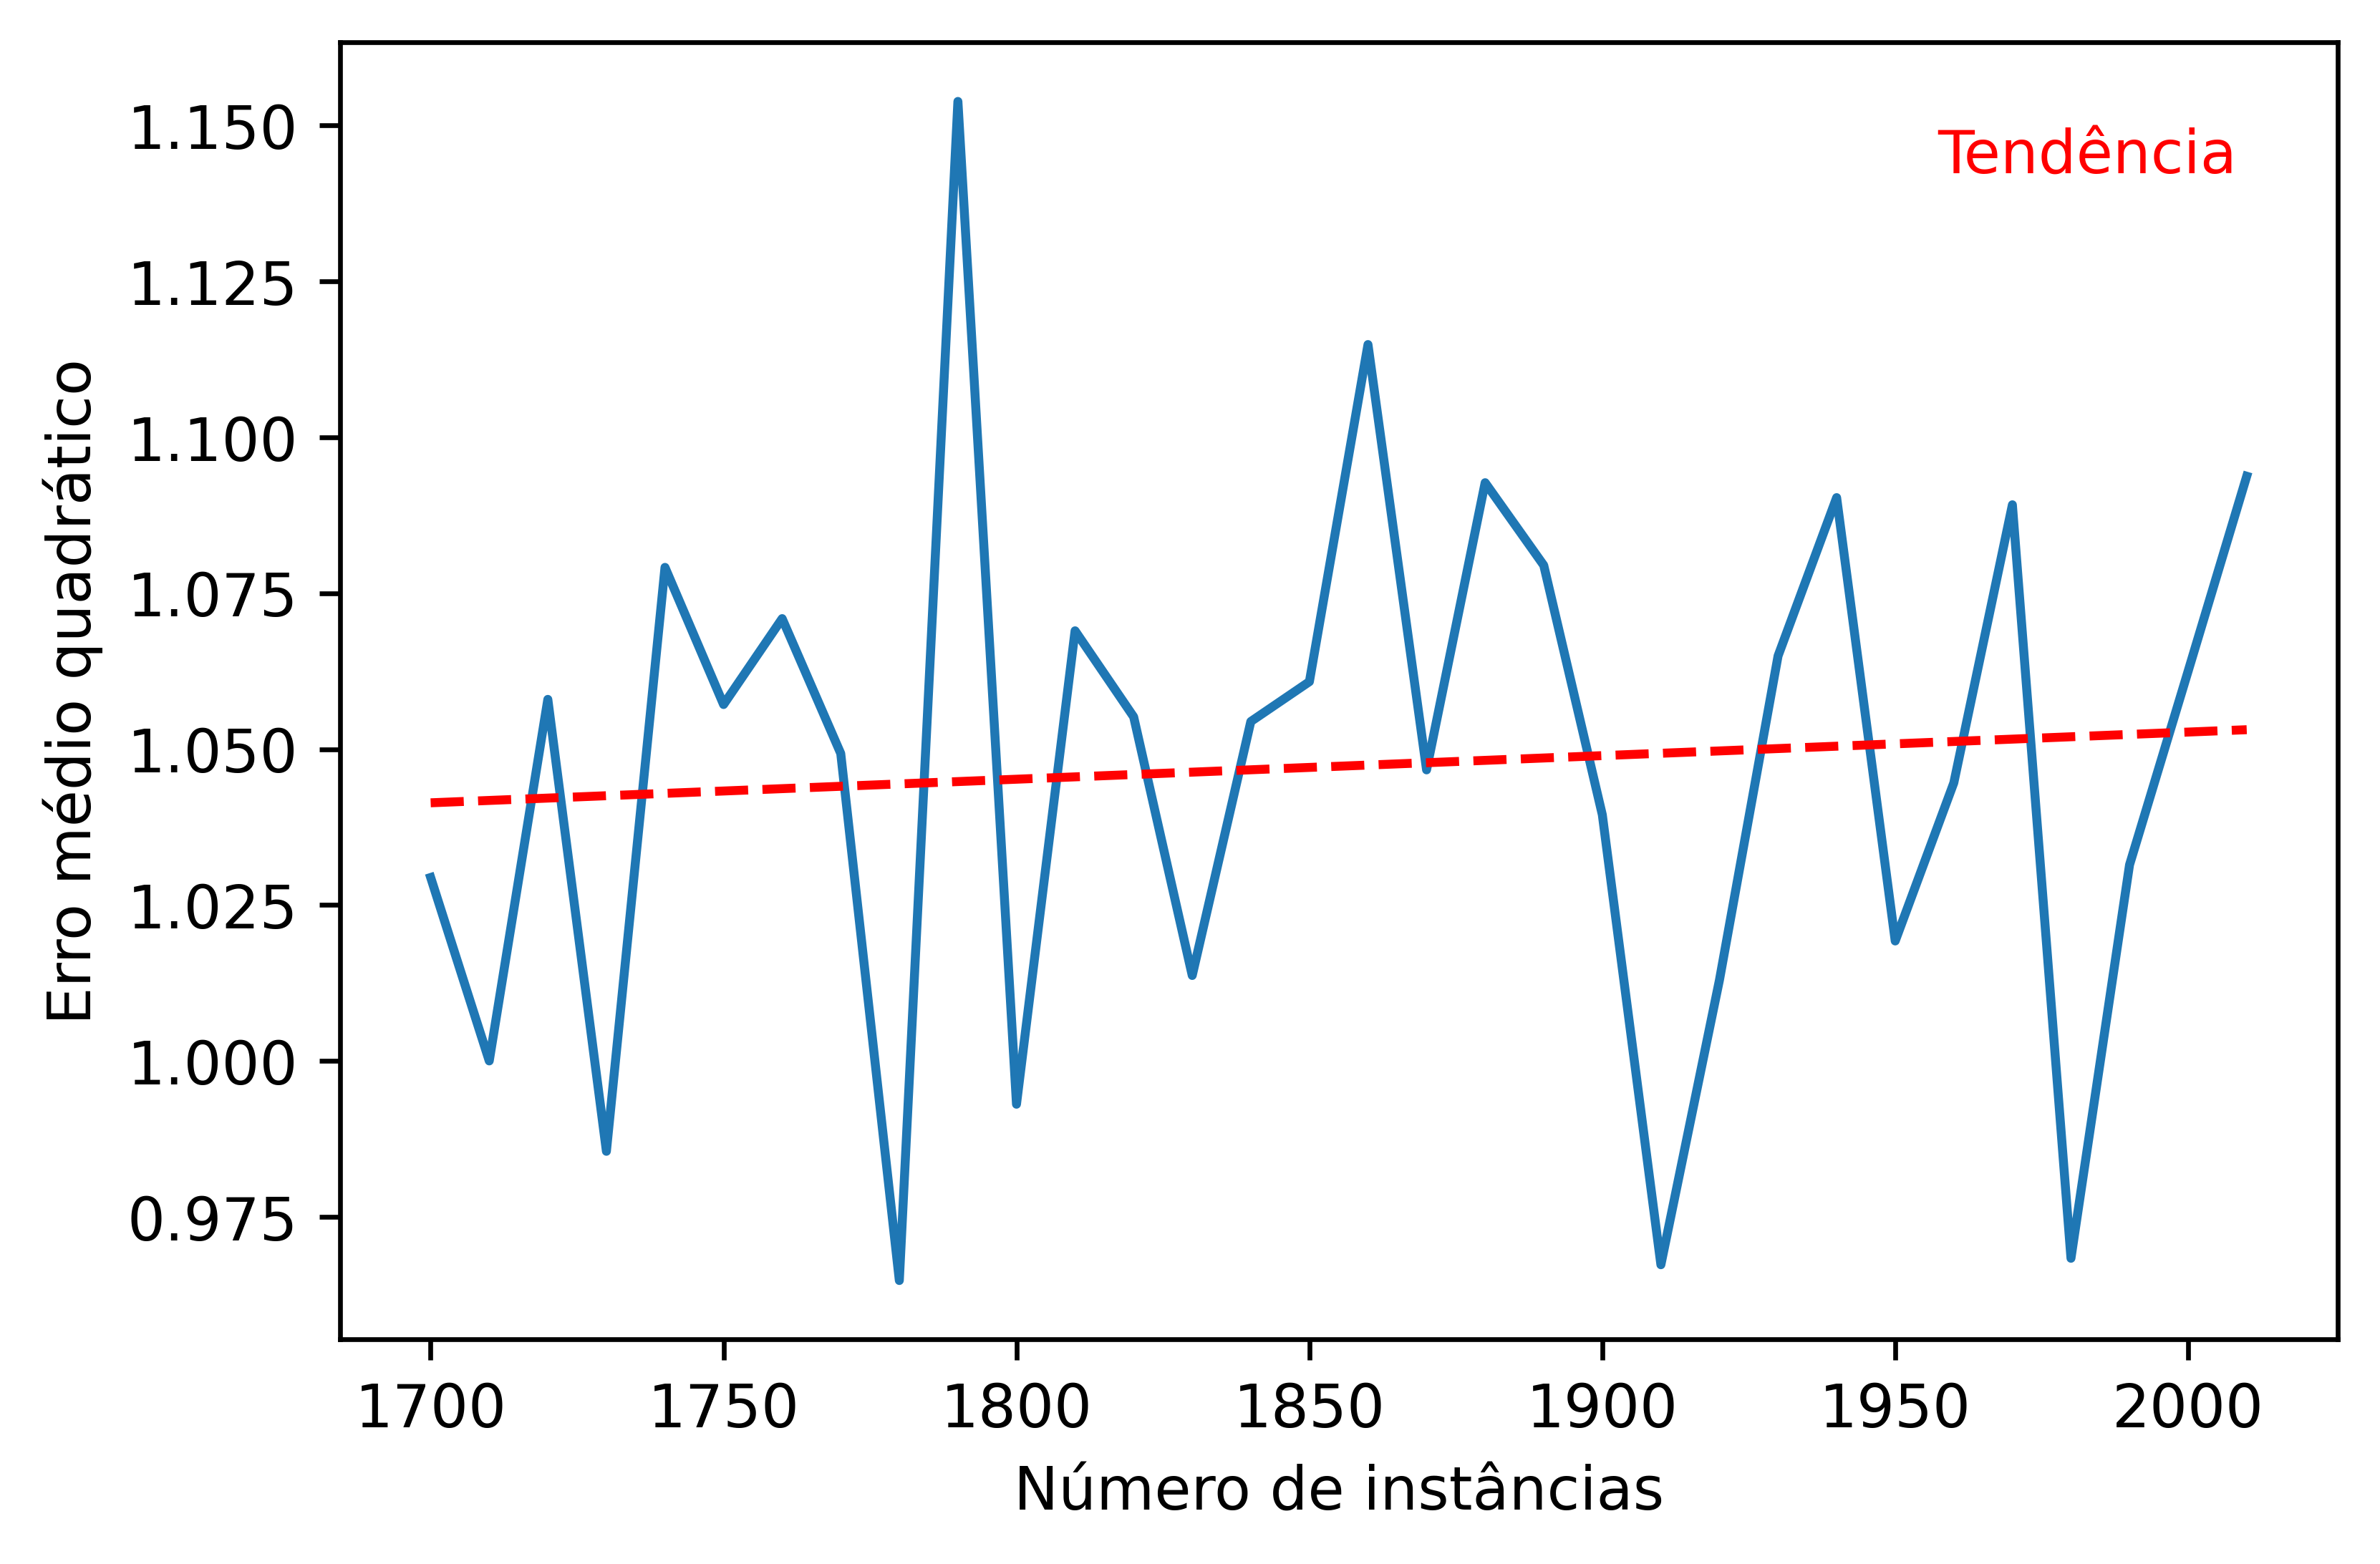

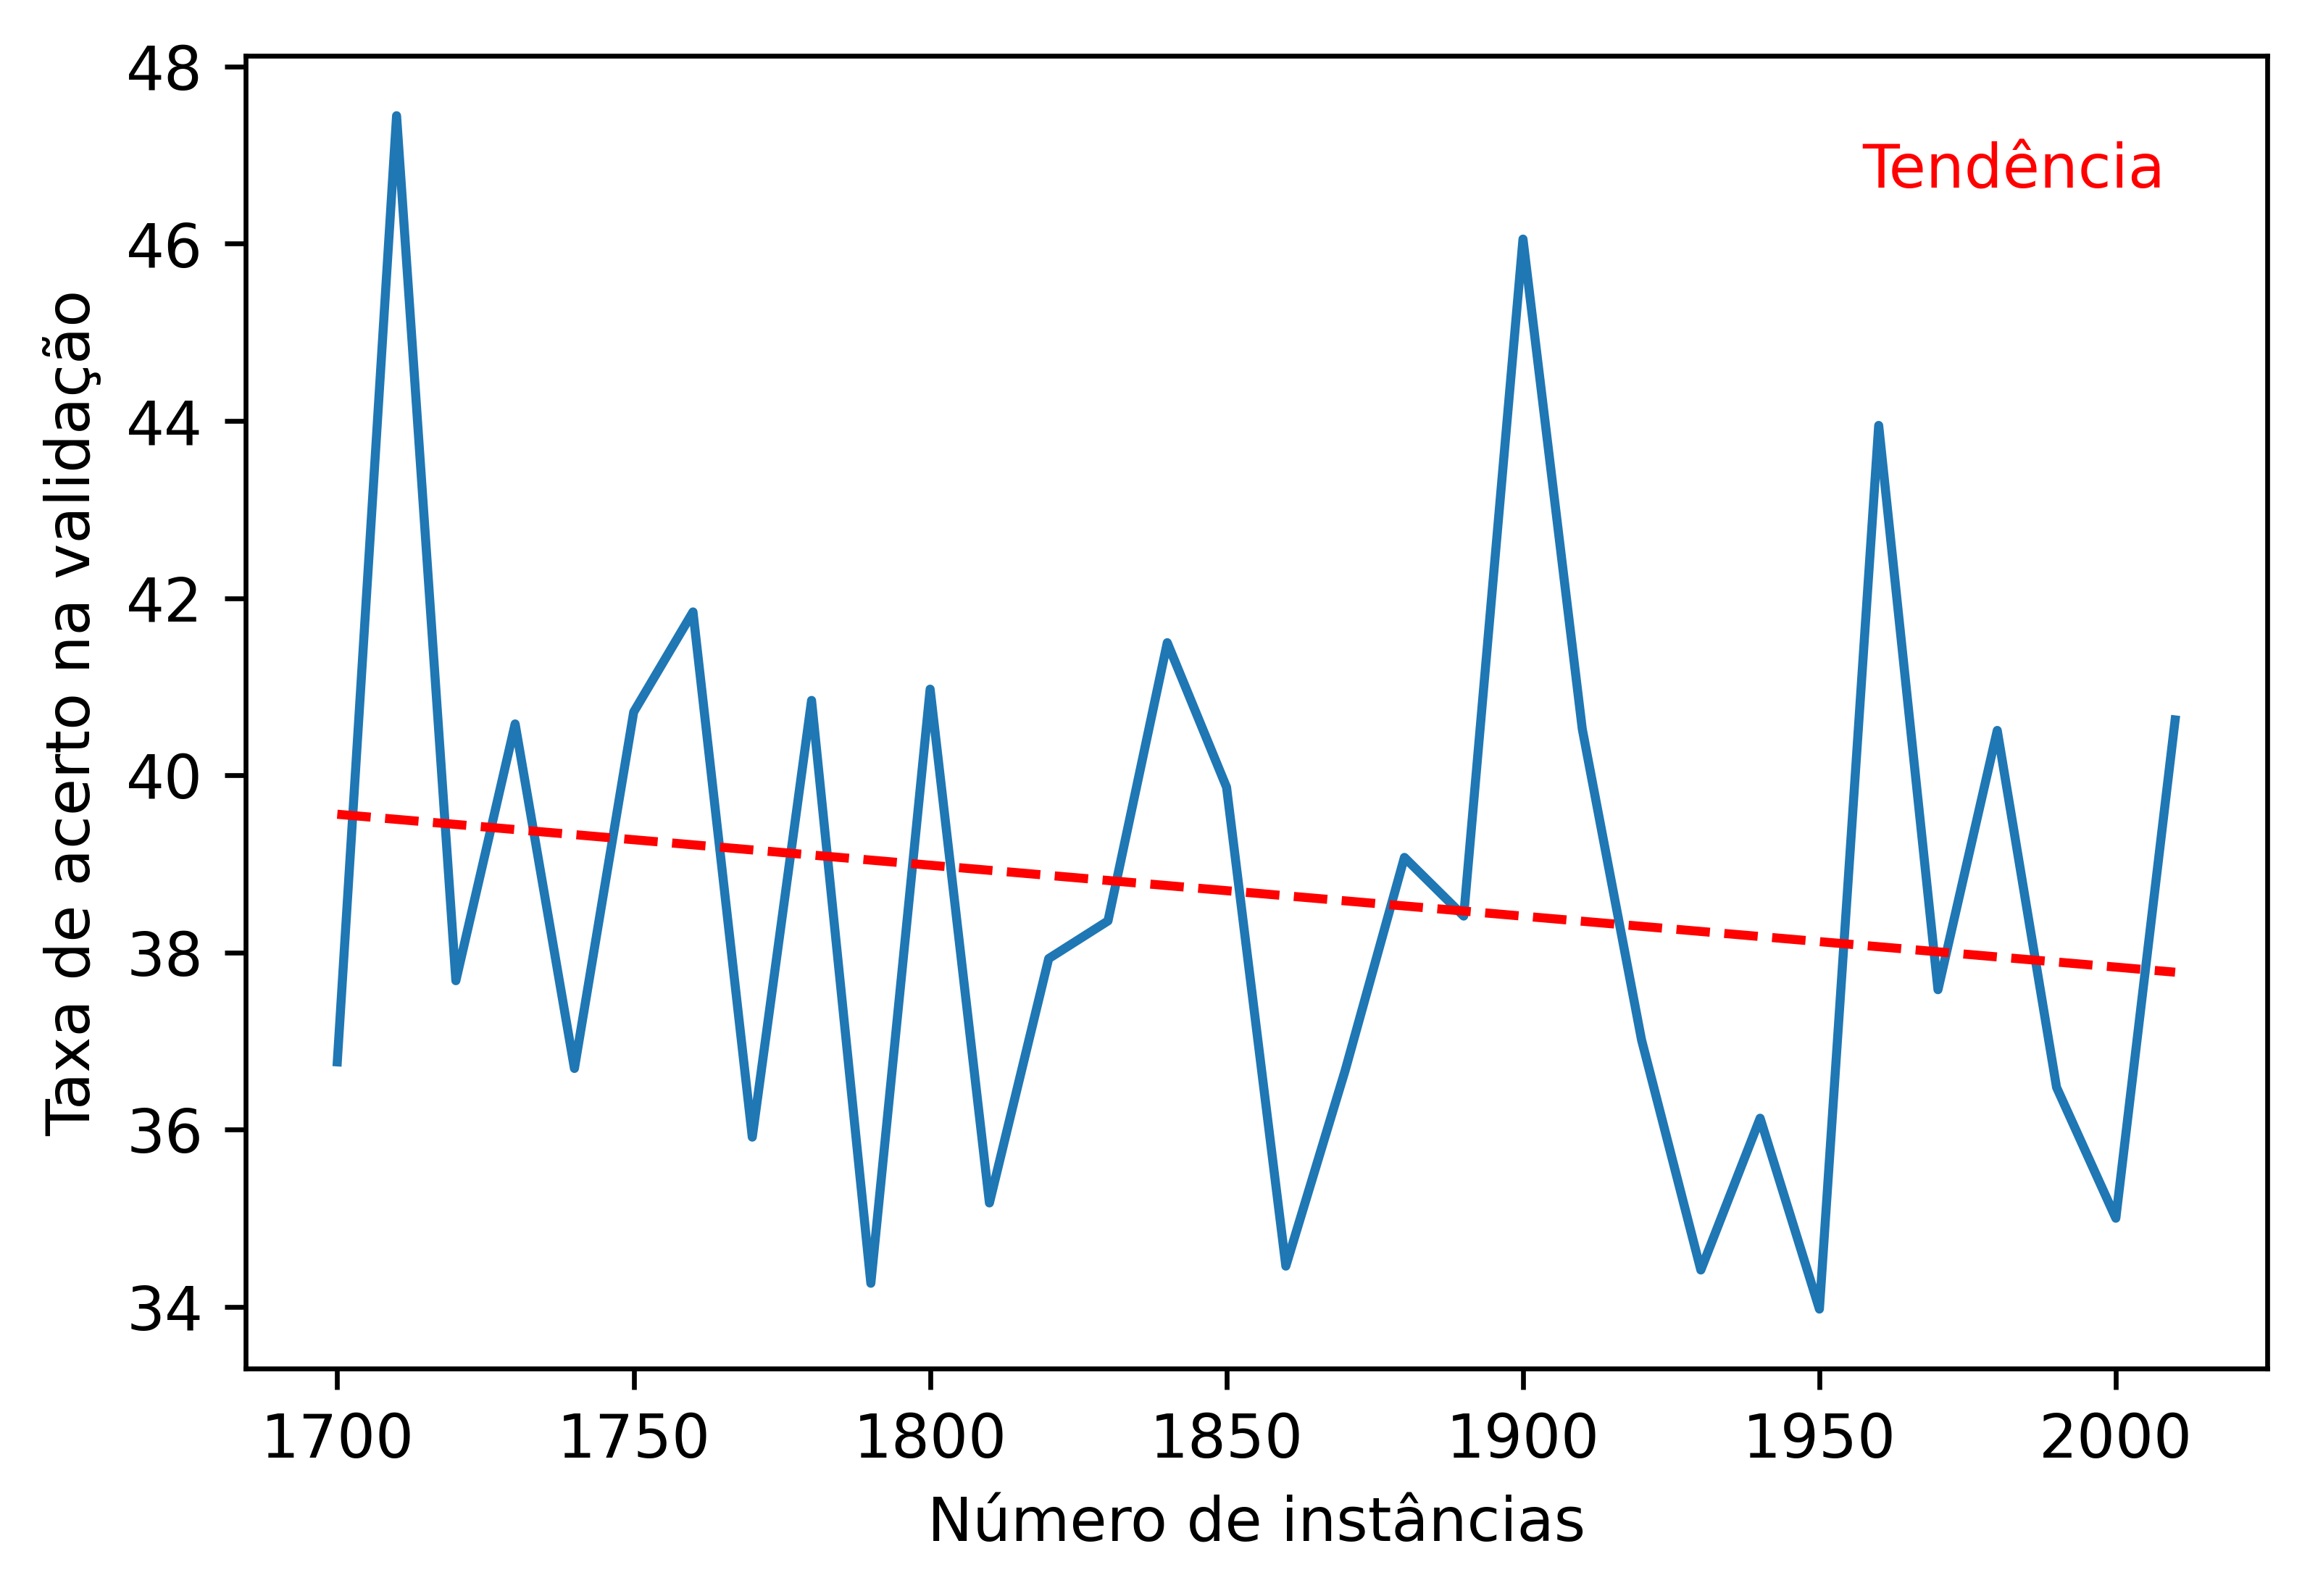

Menor MSE : 0.9683544303797469, acerto:40.50632911392405 para 1980 Instancias.


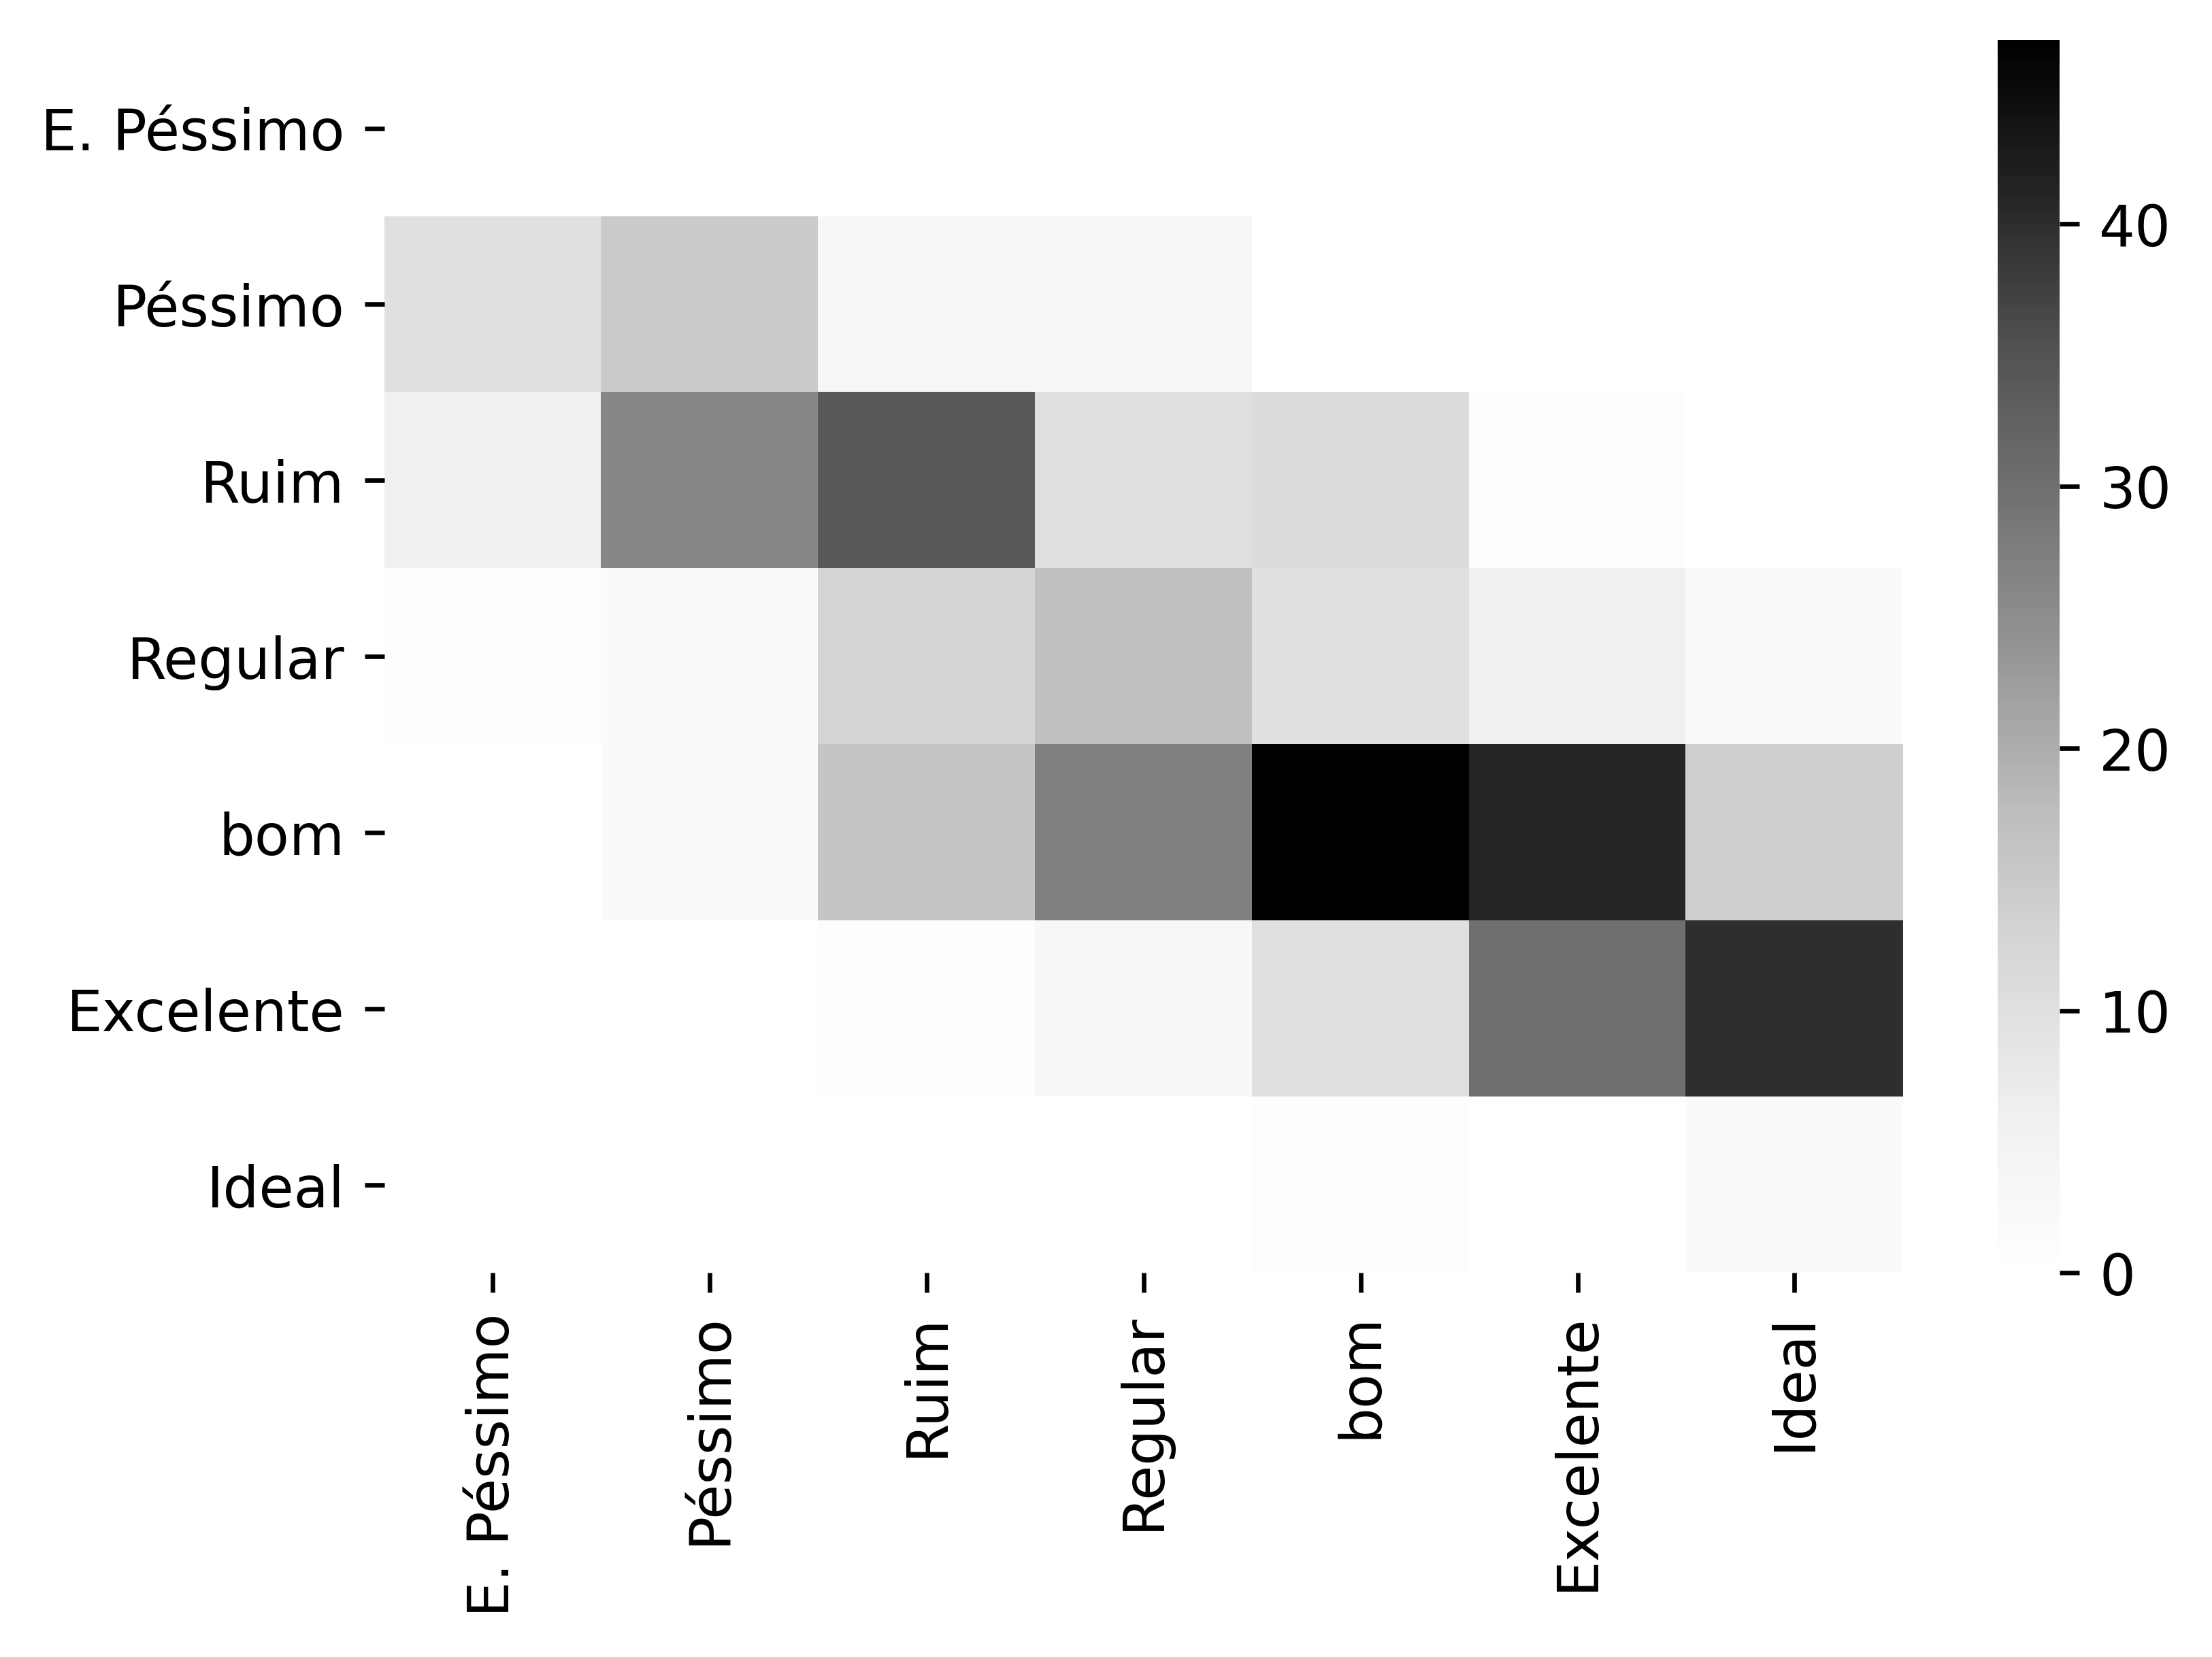

In [21]:
if(tipoExecucao == 3 or tipoExecucao == 4):
 with tf.device(dispositivoUsado):
    plt.plot(QTDIns, MSEIns)
    z = np.polyfit(QTDIns, MSEIns, 1)
    p = np.poly1d(z)
    plt.plot(QTDIns,p(QTDIns),"r--")
    text = f"Tendência"
    plt.gca().text(0.80, 0.90, text,transform=plt.gca().transAxes,fontsize=10,color="red")
    
    plt.xlabel("Número de instâncias")
    plt.ylabel("Erro médio quadrático")
    plt.savefig('Erro por instancias sem acordo.png')
    plt.show()
    
    acertos = []
    if(randomForest):
            acertos = acertoRFIns
    else:
        for K in range(len(predicaoIns)):
            acertos.append(porcentagemAcerto(yIns[K],arredondaVetor(predicaoIns[K])))
    plt.figure()
    plt.plot(QTDIns, acertos)

    z = np.polyfit(QTDIns, acertos, 1)
    p = np.poly1d(z)
    plt.plot(QTDIns,p(QTDIns),"r--")
    text = f"Tendência"
    plt.gca().text(0.80, 0.90, text,transform=plt.gca().transAxes,fontsize=10,color="red")
    
    
    plt.xlabel("Número de instâncias")
    plt.ylabel("Taxa de acerto na validação")
    plt.savefig('Acerto por instancias sem acordo.png')
    plt.show()
    
    menor = 45
    indiceMenor = 0
        
    tamanhoFinal = len(MSEIns)
    tamanhoFinal = tamanhoFinal - (tamanhoFinal/4)
    
    for x in range(int(tamanhoFinal),len(MSEIns)):
        if(MSEIns[x]<menor):
            menor = MSEIns[x]
            indiceMenor = x
    saidaEmTexto = "Menor MSE : "+str(menor)+", acerto:"+str(acertos[indiceMenor])+" para "+str(QTDIns[indiceMenor])+" Instancias."
    print(saidaEmTexto)
    f = open("ultimaExecucaoSemAcordoPorInstancias.txt","w+")
    f.write(saidaEmTexto)
    f.close()
    
    mse,acerto,model,X_test,y_test = rodarModeloRF(dados)
    for ABA in range(20):
        mse1,acerto1,model1,X_test1,y_test1 = rodarModeloRF(dados)
        if(mse1<mse):
            mse = mse1
            acerto = acerto1
            X_test = X_test1
            y_test = y_test1
            model = model1
    y_pred = model.predict(X_test)
    plot_heatMap(y_pred,y_test,"HEATMAPsemACORDO")

In [20]:
if(tipoExecucao == 2 or tipoExecucao == 4):
 plt.rcParams['figure.dpi'] = 600
 with tf.device(dispositivoUsado):
    plt.plot(QTDUsu, MSEUsu)
    z = np.polyfit(QTDUsu, MSEUsu, 1)
    p = np.poly1d(z)
    plt.plot(QTDUsu,p(QTDUsu),"r--")
    text = f"Tendência"
    plt.gca().text(0.80, 0.90, text,transform=plt.gca().transAxes,fontsize=10,color="red")
    plt.xlabel("Número de jogadores")
    plt.ylabel("Erro médio quadrático")
    plt.savefig('Erro por jogadores sem acordo.png')
    plt.show()
    
    acertos = []
    for K in range(len(predicaoUsu)):
        if(randomForest):
            acertos.append(acertoRFUsu[K])
        else:
            acertos.append(porcentagemAcerto(yUsu[K],arredondaVetor(predicaoUsu[K])))
    plt.figure()
    plt.plot(QTDUsu, acertos)
    z = np.polyfit(QTDUsu, acertos, 1)
    p = np.poly1d(z)
    plt.plot(QTDUsu,p(QTDUsu),"r--")
    text = f"Tendência"
    plt.gca().text(0.80, 0.90, text,transform=plt.gca().transAxes,fontsize=10,color="red")
    plt.xlabel("Número de jogadores")
    plt.ylabel("Taxa de acerto na validação")
    plt.savefig('Acerto por jogadores sem acordo.png')
    plt.show()
    
    menor = 45
    indiceMenor = 0
    for x in range(0,len(MSEUsu)):
        if(MSEUsu[x]<menor):
            menor = MSEUsu[x]
            indiceMenor = x
    saidaEmTexto = "Menor MSE foi: "+str(menor)+" para "+str(QTDUsu[indiceMenor])+" usuario(s)."
    print(saidaEmTexto)
    f = open("ultimaExecucaoSemAcordoPorUsuario.txt","w+")
    f.write(saidaEmTexto)
    f.close()

--------------------- Treinamento com HL2 e Spelunky---------------------
MSE treinamento: 1.01 acerto: 37.89
MSE validação com Fear: 1.63 acerto: 33.87


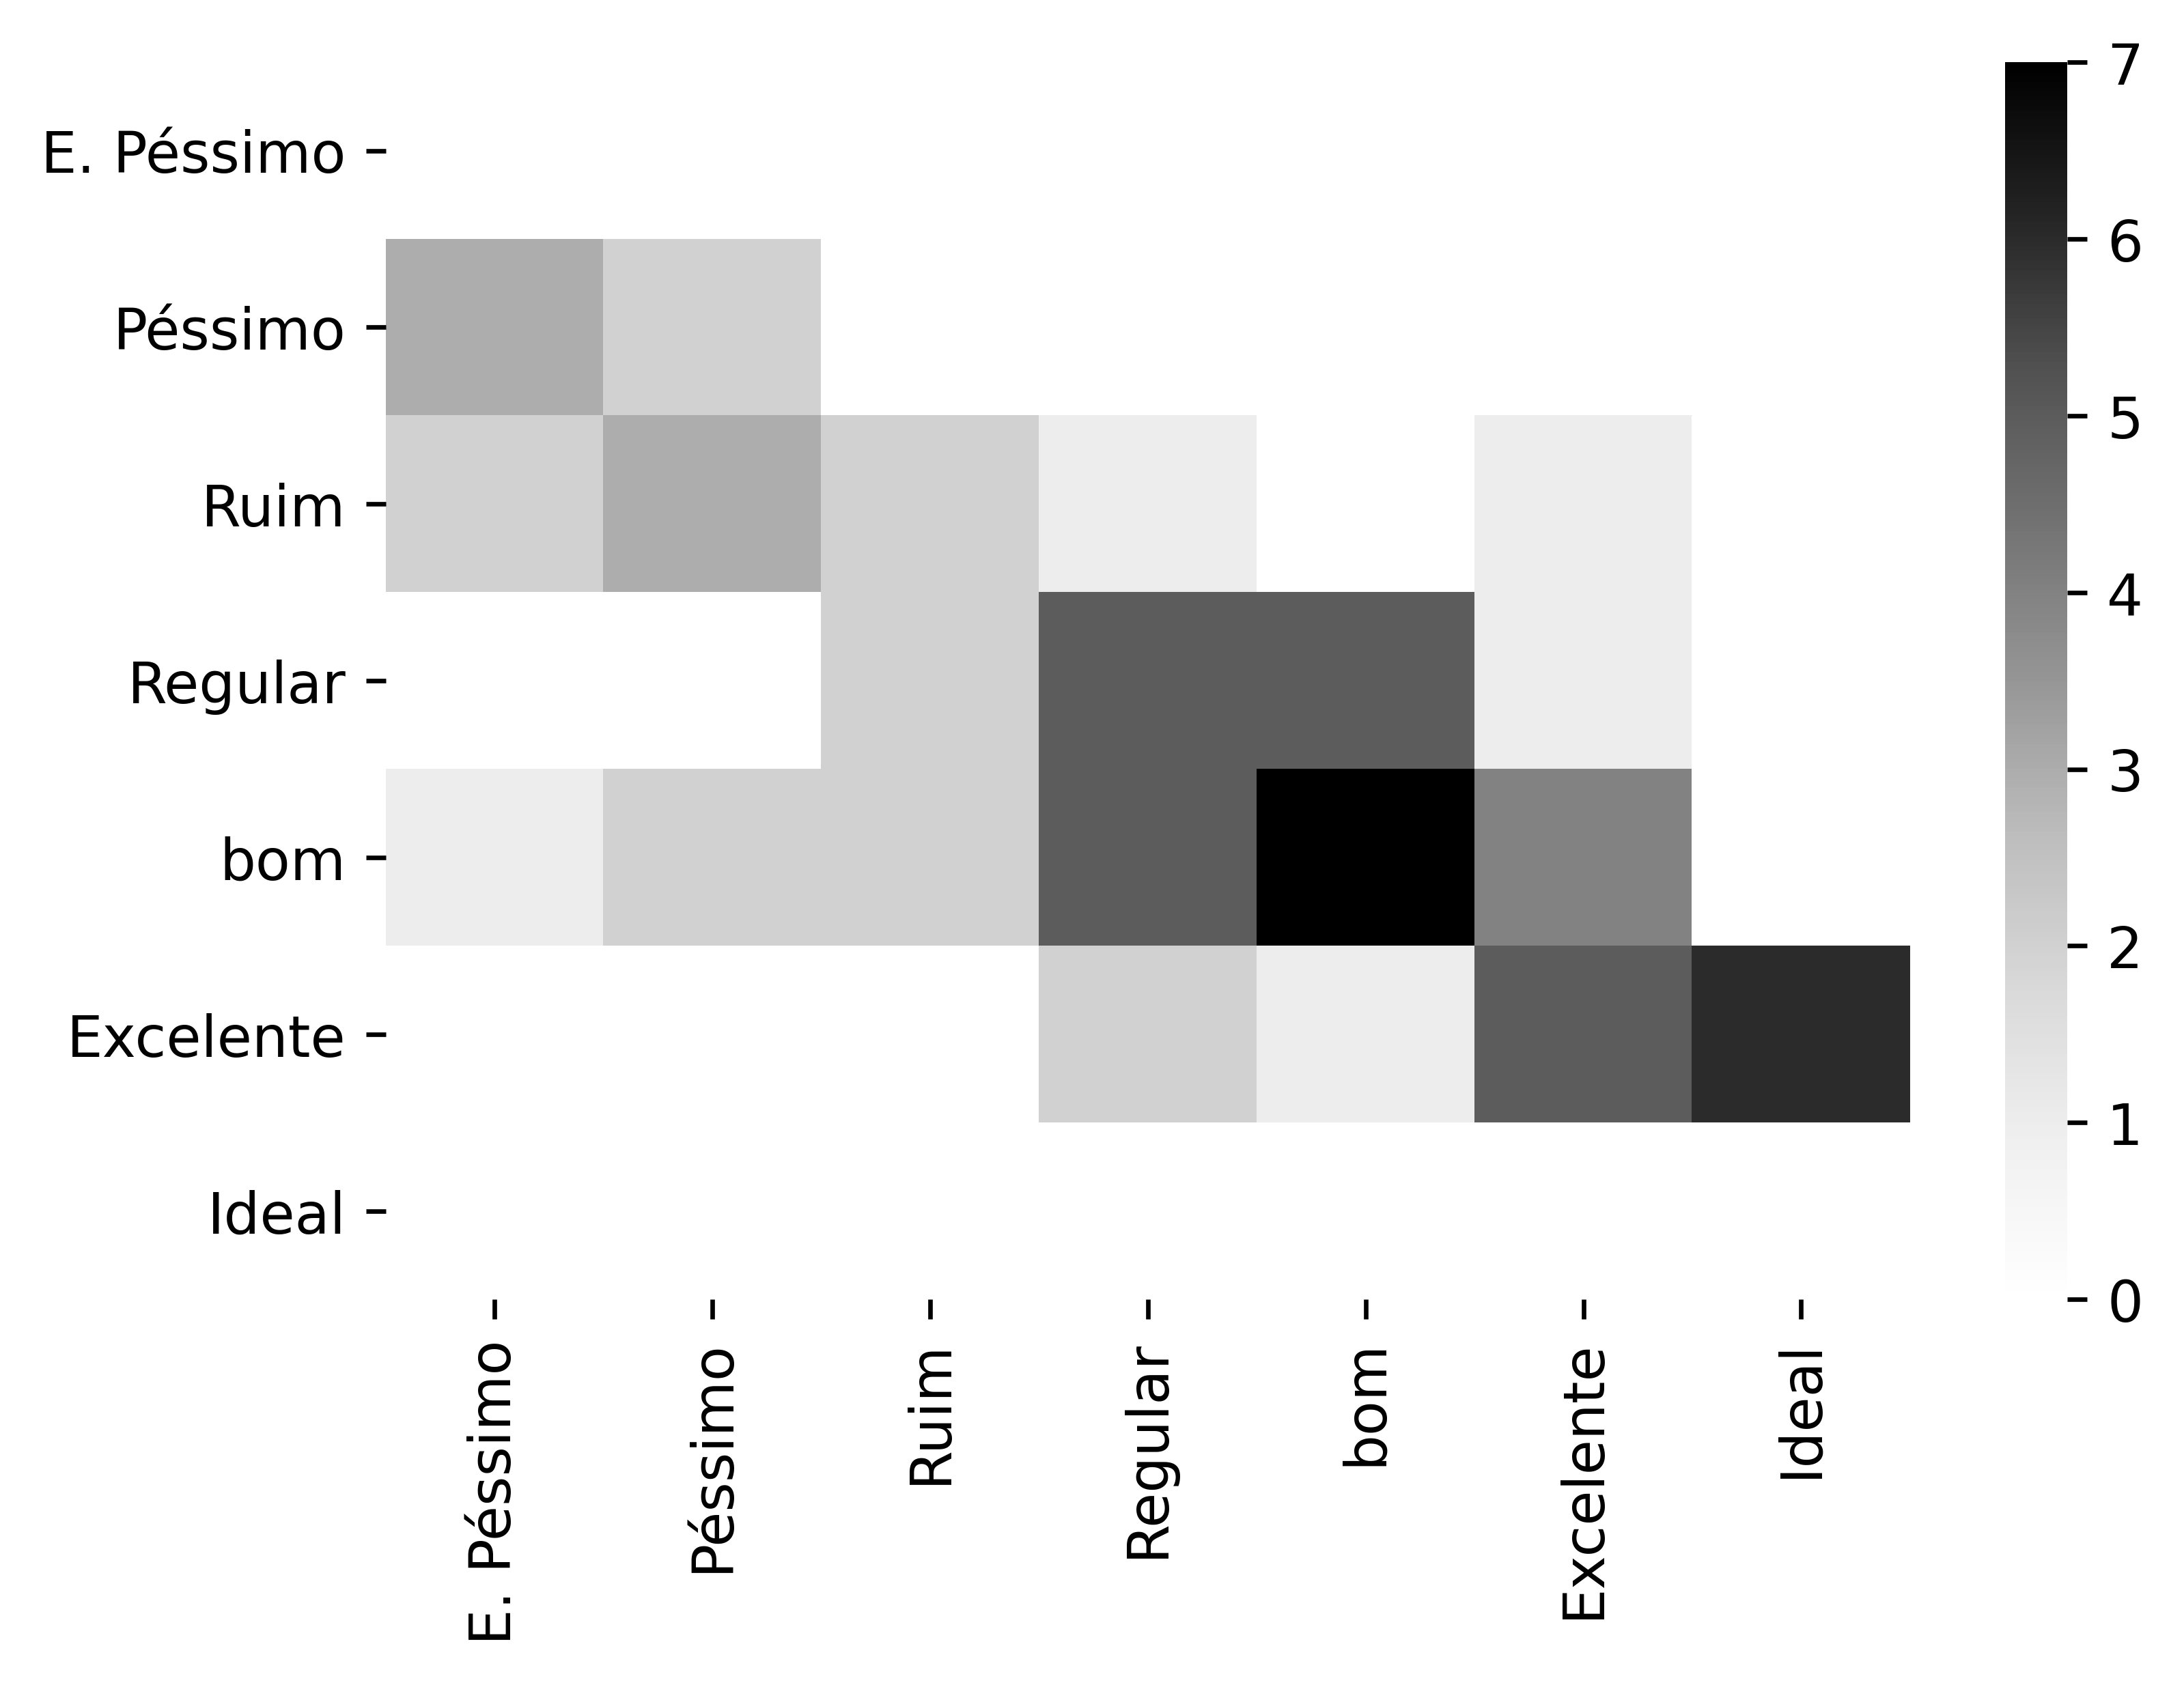

--------------------- Treinamento somente com HL2---------------------
MSE treinamento: 0.88 acerto: 44.44
MSE validação com Fear: 1.5 acerto: 33.87


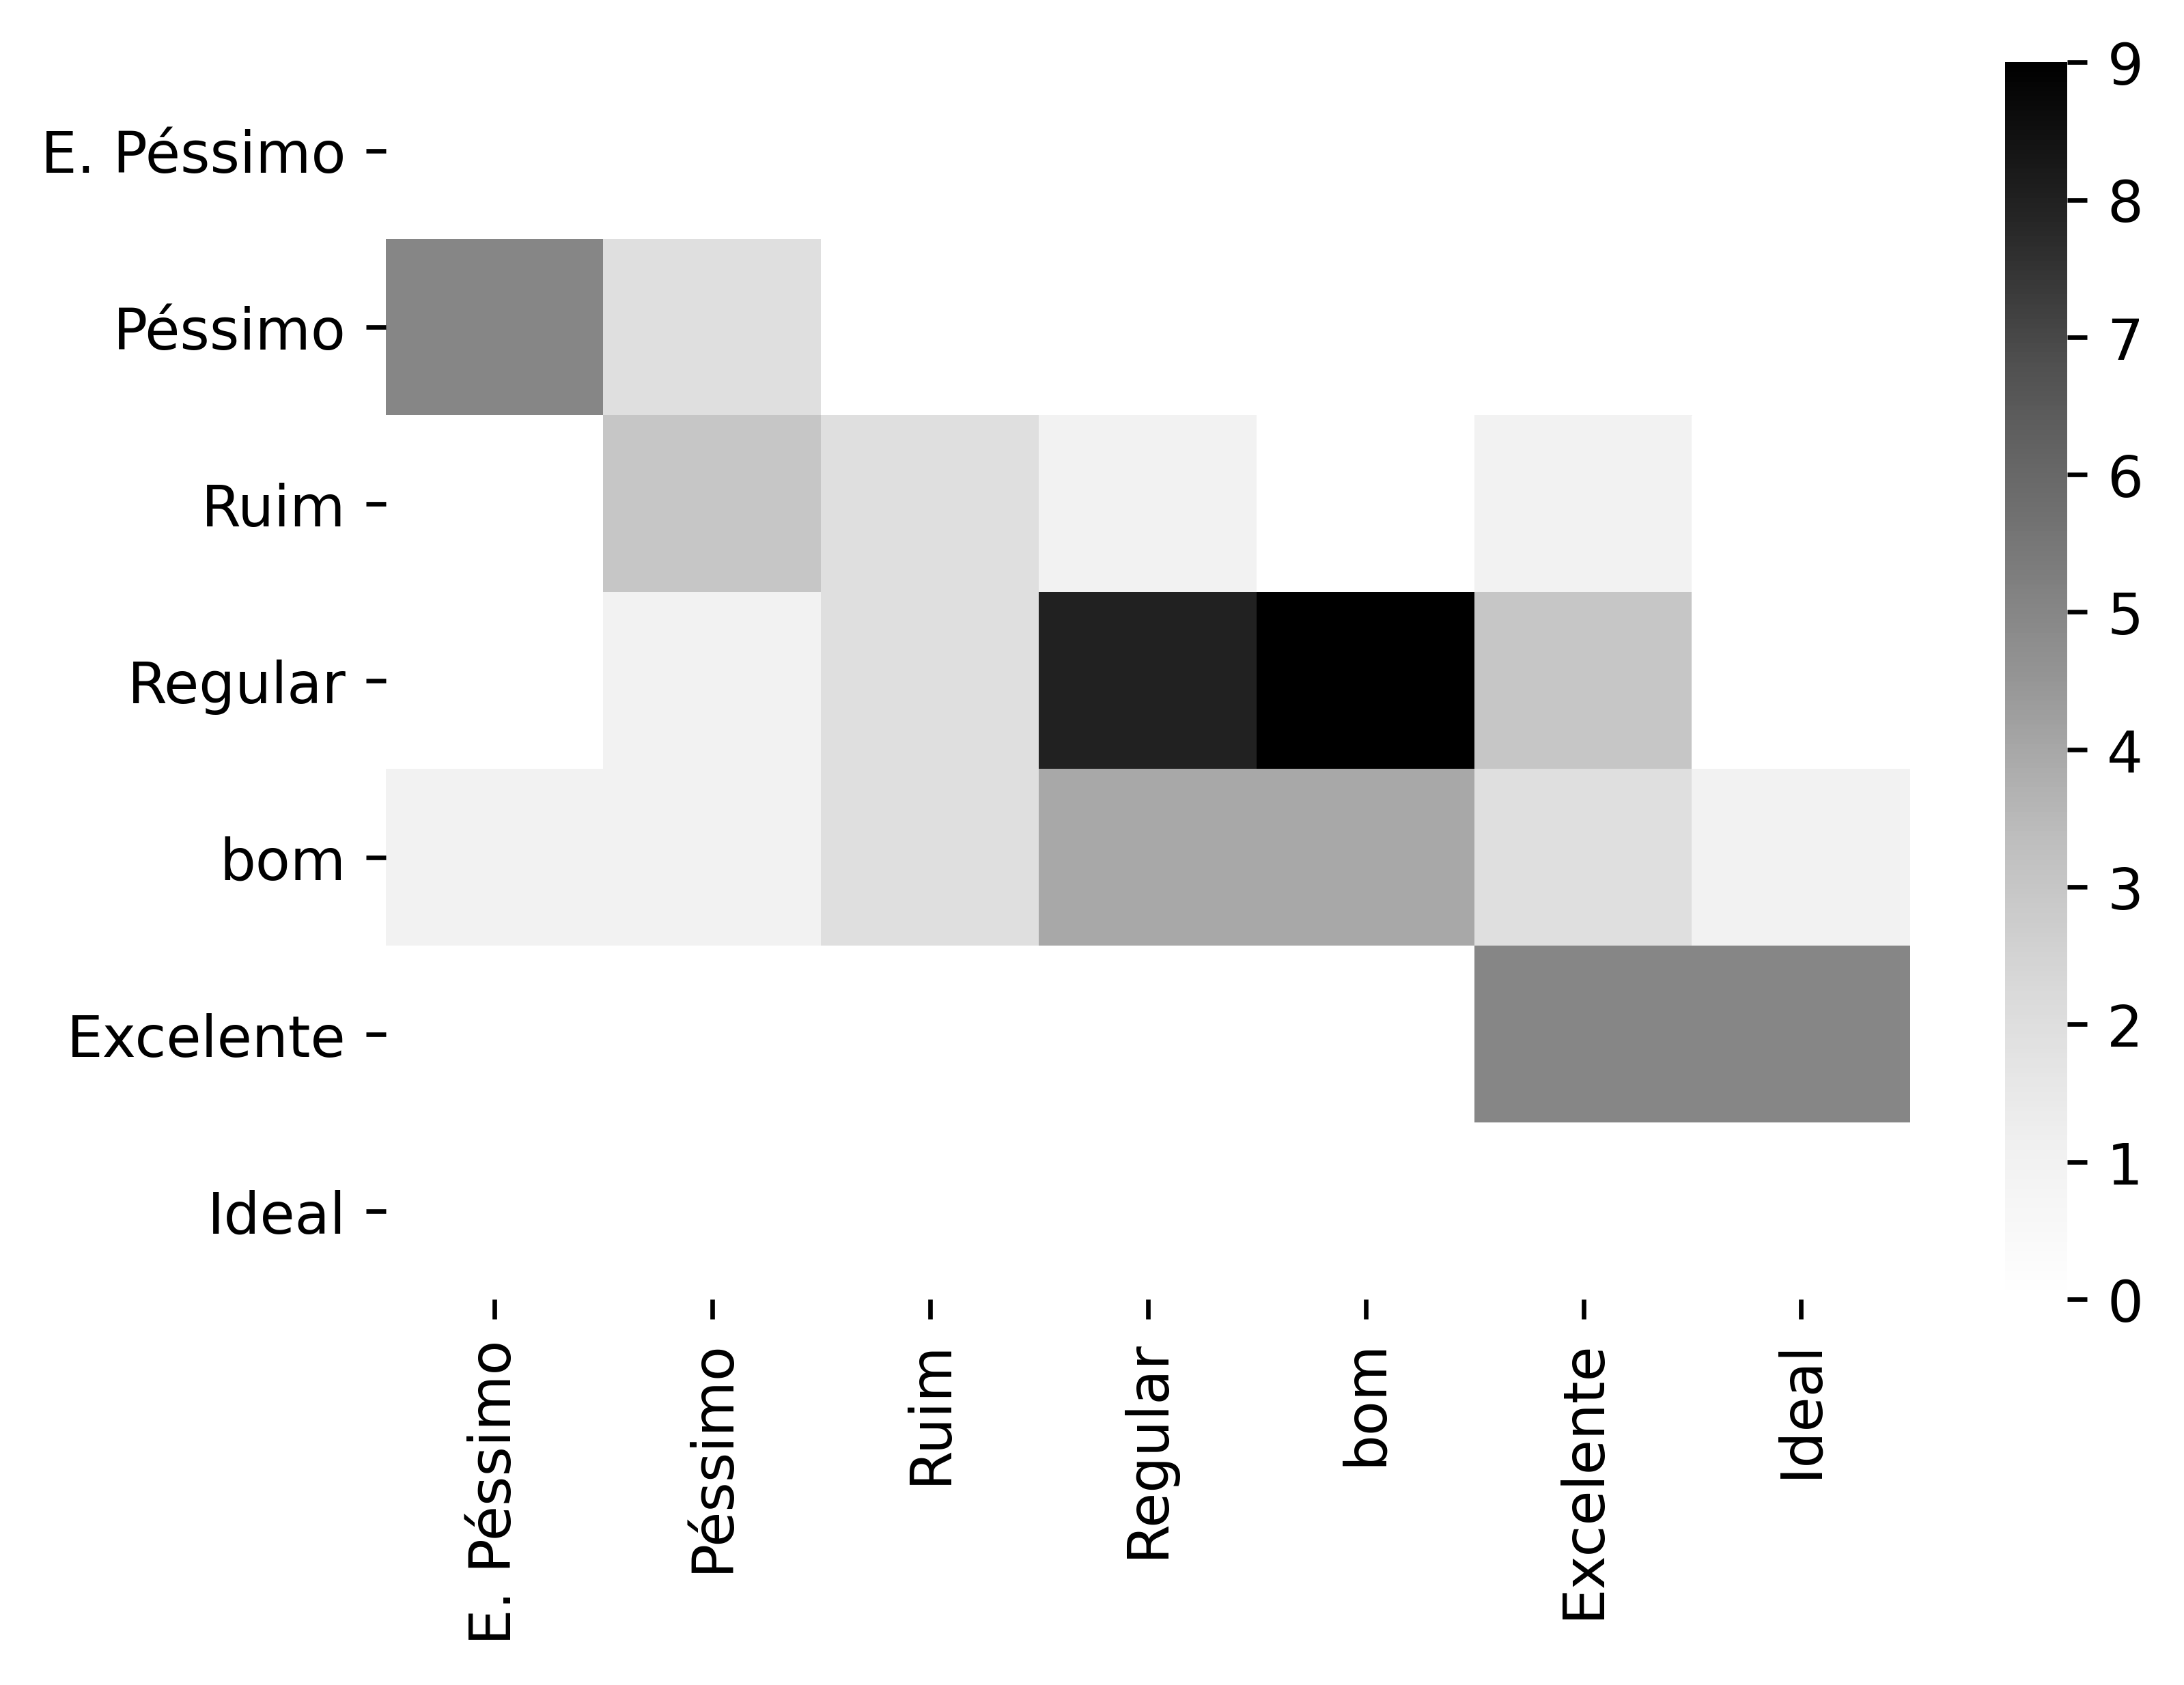

In [26]:
validacaoFear = True
if(validacaoFear):
    from sklearn.metrics import mean_squared_error
    print("--------------------- Treinamento com HL2 e Spelunky---------------------")
    mse,acerto,model,X_test,y_test = rodarModeloRFFear(dados)
    for ABA in range(20):
        mse1,acerto1,model1,X_test1,y_test1 = rodarModeloRFFear(dados)
        if(mse1<mse):
            mse = mse1
            acerto = acerto1
            X_test = X_test1
            y_test = y_test1
            model = model1
    print("MSE treinamento: "+str(round(mse,2))+" acerto: "+str(round(acerto,2)))
    y_pred = model.predict(X_test)
    test_predictions_round = arredondaVetor(y_pred)
    porcentagemAcertos1 = porcentagemAcerto(y_test,test_predictions_round)
    mse1 = mean_squared_error(y_test,test_predictions_round)
    print("MSE validação com Fear: "+str(round(mse1,2))+" acerto: "+str(round(porcentagemAcertos1,2)))
    plot_heatMap(y_pred,y_test,"semAcordoFearAmbos")
    print("--------------------- Treinamento somente com HL2---------------------")
    mse,acerto,model,X_test,y_test = rodarModeloRFFear(dadosHL2)
    for ABA in range(20):
        mse1,acerto1,model1,X_test1,y_test1 = rodarModeloRFFear(dadosHL2)
        if(mse1<mse):
            mse = mse1
            acerto = acerto1
            X_test = X_test1
            y_test = y_test1
            model = model1
    print("MSE treinamento: "+str(round(mse,2))+" acerto: "+str(round(acerto,2)))
    y_pred = model.predict(X_test)
    test_predictions_round = arredondaVetor(y_pred)
    porcentagemAcertos1 = porcentagemAcerto(y_test,test_predictions_round)
    mse1 = mean_squared_error(y_test,test_predictions_round)
    print("MSE validação com Fear: "+str(round(mse1,2))+" acerto: "+str(round(porcentagemAcertos1,2)))
    plot_heatMap(y_pred,y_test,"semAcordoFearHL2")

# 